# Building the CNN Model for Fashion Mnist


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import keras
from keras.datasets import fashion_mnist


from sklearn.metrics import confusion_matrix

# Load Dataset


In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape   ## 60000 = no. of images and 28*28 = resolution of the image

((60000, 28, 28), (60000,))

In [4]:
x_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [5]:
x_train[0]    ## lets see an image how it looks like

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [6]:
y_train[0]    ## 9th class

9

In [7]:
# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankle boot

In [8]:
## lets create lables

class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
len(class_labels)

10

In [10]:
## inorder to visualize image plt.imshow() is the function

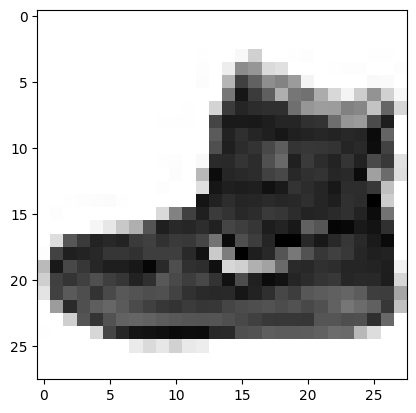

In [11]:
plt.imshow(x_train[0],cmap = "Greys")

In [12]:
 x_train.ndim  # check dimension

3

In [13]:
## expand the dimension of image

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [14]:
x_train.ndim

4

# Scalling of images inorder to have early convergence


In [15]:
## min max Scaler

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
## lets check
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [18]:
## split the dataset in train_test_split

In [19]:
 x_train,x_val,y_train, y_val = train_test_split(x_train, y_train,
                                                 random_state = 42,
                                                 test_size = 0.2)

In [20]:
x_train.shape, x_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

# Building architecture for CNN model

In [21]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = (1,1), padding = "valid", activation = "relu", input_shape = [28,28,1]),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation = "relu"),
    keras.layers.Dense(units = 10, activation = "softmax")

])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [23]:
 model.compile(
     optimizer = "adam",
     loss = "sparse_categorical_crossentropy",
     metrics = ["accuracy"]
 )

In [24]:
model.fit(x_train,
          y_train,
          epochs = 30,
          batch_size = 512,
          verbose = True,
          validation_data = (x_val, y_val)
          )

Epoch 1/30
94/94 [==============================] - 9s 25ms/step - loss: 0.6306 - accuracy: 0.7861 - val_loss: 0.4387 - val_accuracy: 0.8425
Epoch 2/30
94/94 [==============================] - 1s 12ms/step - loss: 0.3794 - accuracy: 0.8694 - val_loss: 0.3584 - val_accuracy: 0.8733
Epoch 3/30
94/94 [==============================] - 1s 12ms/step - loss: 0.3350 - accuracy: 0.8842 - val_loss: 0.3266 - val_accuracy: 0.8829
Epoch 4/30
94/94 [==============================] - 1s 12ms/step - loss: 0.3078 - accuracy: 0.8933 - val_loss: 0.3123 - val_accuracy: 0.8880
Epoch 5/30
94/94 [==============================] - 1s 11ms/step - loss: 0.2876 - accuracy: 0.9000 - val_loss: 0.2932 - val_accuracy: 0.8949
Epoch 6/30
94/94 [==============================] - 1s 10ms/step - loss: 0.2691 - accuracy: 0.9051 - val_loss: 0.2778 - val_accuracy: 0.8992
Epoch 7/30
94/94 [==============================] - 1s 10ms/step - loss: 0.2568 - accuracy: 0.9105 - val_loss: 0.2722 - val_accuracy: 0.9015
Epoch 8/30
94

# Testing the model

In [25]:
model.predict(np.expand_dims(x_test[1], axis = 0)).round(2)

1/1 [==============================] - 0s 104ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_test[1]      ## our prediction is correct

2

In [27]:
y_pred = model.predict(x_test).round(2)

313/313 [==============================] - 1s 2ms/step


In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.9131


[0.27216169238090515, 0.913100004196167]

<Axes: >

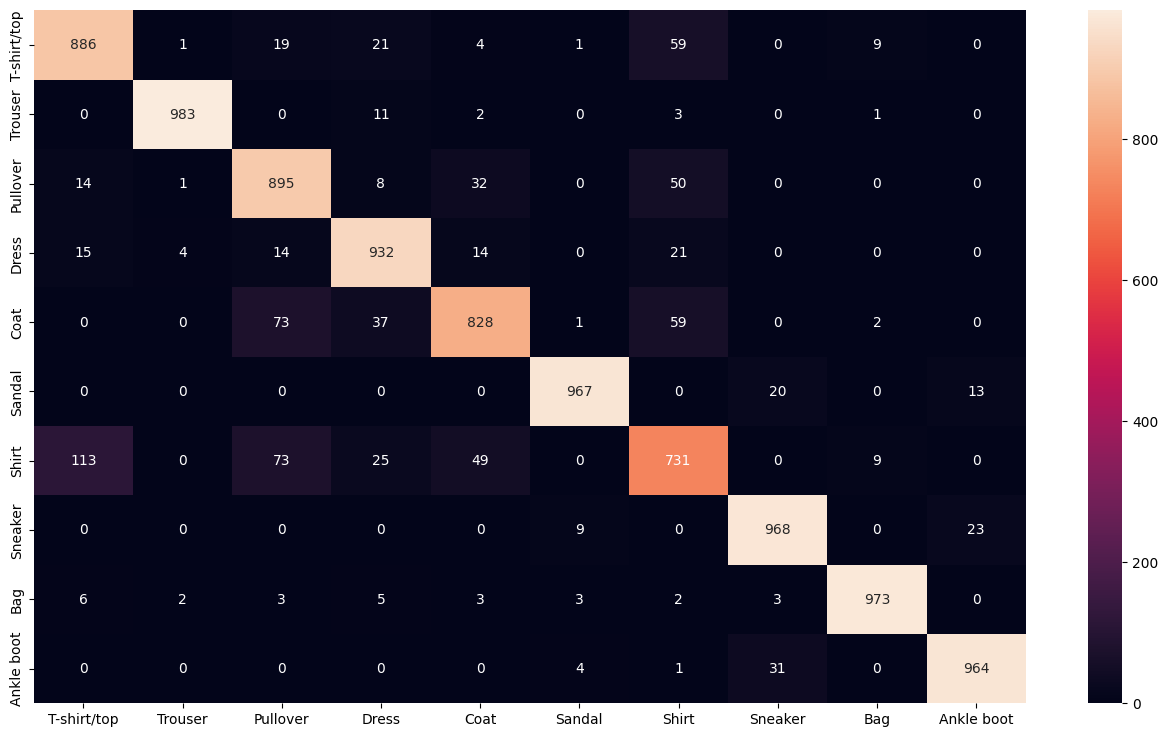

In [30]:
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]

cnf = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cnf,
            annot = True,
            fmt = "d",
            xticklabels = class_labels,
            yticklabels = class_labels )

In [31]:
# we can understand here missclassification